In [1]:
import os
import scipy
import shutil, sys, random
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from shutil import copyfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass

In [ ]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
# !git clone https://github.com/Bangkit-C23-PS311/Data.git tmp/Data

In [ ]:
# !rm -rf tmp/Data/.git

In [ ]:
# ! pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# ! kaggle datasets list
# ! kaggle datasets download -d 'mlanangafkaar/datasets-lemlitbang-sibi-alphabets' -p '/tmp/'
# ! mkdir "/tmp/dataSibi"

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ! unzip "/tmp/datasets-lemlitbang-sibi-alphabets.zip" -d "/tmp/dataSibi"

In [3]:
for directories in os.listdir("../Data"):
    if not directories.startswith('.'):
        dir = os.path.join("../Data", directories)
        print(f"There are {len(os.listdir(dir))} images of {directories}.")

There are 45 images of A.
There are 54 images of B.
There are 56 images of C.
There are 56 images of D.
There are 55 images of E.
There are 55 images of F.
There are 56 images of G.
There are 56 images of H.
There are 55 images of I.
There are 55 images of J.
There are 53 images of K.
There are 65 images of L.
There are 67 images of M.
There are 65 images of N.
There are 64 images of O.
There are 53 images of P.
There are 48 images of Q.
There are 55 images of R.
There are 56 images of S.
There are 51 images of T.
There are 56 images of U.
There are 56 images of V.
There are 55 images of W.
There are 51 images of X.
There are 55 images of Y.
There are 44 images of Z.


In [4]:
root_dir = 'tmp/sibi'
training_dirs = []
validation_dirs = []

for i in os.listdir("../Data"):
    if not i.startswith('.'):
        training_dirs.append(os.path.join(root_dir, 'training', i))
        validation_dirs.append(os.path.join(root_dir, 'validation', i))

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(dirs):
  for dir in dirs:
    os.makedirs(dir)
  pass

try:
  create_train_val_dirs(training_dirs)
  create_train_val_dirs(validation_dirs)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  actual_image = []
  for file in os.listdir(SOURCE_DIR):
    if os.path.getsize(os.path.join(SOURCE_DIR, file)) > 1:
      actual_image.append(file)
    else:
      print("{} is zero length, so ignoring.".format(file))
  
  random.shuffle(actual_image)

  split_index = int(len(actual_image) * SPLIT_SIZE)

  [copyfile(os.path.join(SOURCE_DIR, file), os.path.join(TRAINING_DIR, file)) for file in actual_image[:split_index]]
  [copyfile(os.path.join(SOURCE_DIR, file), os.path.join(VALIDATION_DIR, file)) for file in actual_image[split_index:]]
  pass


  ### END CODE HERE

In [6]:
for directories in os.listdir("../Data"):
    if not directories.startswith('.'):
      SOURCE_DIR = os.path.join("../Data", directories)
      TRAINING_DIR = "tmp/sibi/training/"
      VALIDATION_DIR = "tmp/sibi/validation/"

      TRAINING_X_DIR = os.path.join(TRAINING_DIR, directories)
      VALIDATION_X_DIR = os.path.join(VALIDATION_DIR, directories)

      if len(os.listdir(TRAINING_X_DIR)) > 0:
        for file in os.scandir(TRAINING_X_DIR):
          os.remove(file.path)
      if len(os.listdir(VALIDATION_X_DIR)) > 0:
        for file in os.scandir(VALIDATION_X_DIR):
          os.remove(file.path)

      split_size = .8
      split_data(SOURCE_DIR, TRAINING_X_DIR, VALIDATION_X_DIR, split_size)

      print(f"There are {len(os.listdir(TRAINING_X_DIR))} images of {directories} for training")
      print(f"There are {len(os.listdir(VALIDATION_X_DIR))} images of {directories} for validation\n")

There are 36 images of A for training
There are 9 images of A for validation

There are 43 images of B for training
There are 11 images of B for validation

There are 44 images of C for training
There are 12 images of C for validation

There are 44 images of D for training
There are 12 images of D for validation

There are 44 images of E for training
There are 11 images of E for validation

There are 44 images of F for training
There are 11 images of F for validation

There are 44 images of G for training
There are 12 images of G for validation

There are 44 images of H for training
There are 12 images of H for validation

There are 44 images of I for training
There are 11 images of I for validation

There are 44 images of J for training
There are 11 images of J for validation

There are 42 images of K for training
There are 11 images of K for validation

There are 52 images of L for training
There are 13 images of L for validation

There are 53 images of M for training
There are 14 im

In [6]:
# dir_files = "/tmp/dataSibi/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02"
# for directories in os.listdir(os.path.join(dir_files, 'training')): 
#   SOURCE_DIR = os.path.join(dir_files, 'training', directories)
#   TRAINING_DIR = "/tmp/sibi/training/"
#   VALIDATION_DIR = "/tmp/sibi/validation/"

#   TRAINING_X_DIR = os.path.join(TRAINING_DIR, directories)
#   VALIDATION_X_DIR = os.path.join(VALIDATION_DIR, directories)

#   # if len(os.listdir(TRAINING_X_DIR)) > 0:
#   #   for file in os.scandir(TRAINING_X_DIR):
#   #     os.remove(file.path)
#   # if len(os.listdir(VALIDATION_X_DIR)) > 0:
#   #   for file in os.scandir(VALIDATION_X_DIR):
#   #     os.remove(file.path)

#   split_size = 1.0
#   split_data(SOURCE_DIR, TRAINING_X_DIR, VALIDATION_X_DIR, split_size)

#   print(f"There are {len(os.listdir(TRAINING_X_DIR))} images of {directories} for training")
#   print(f"There are {len(os.listdir(VALIDATION_X_DIR))} images of {directories} for validation\n")

In [7]:
print("Sample X image:")
sample_image = load_img(os.path.join(TRAINING_X_DIR, os.listdir(TRAINING_X_DIR)[8]))
print(TRAINING_X_DIR)
sample_array = img_to_array(sample_image)
print(f"Each image has shape: {sample_array.shape}")
# plt.imshow(load_img("tmp/sibi/training/Z/IMG_20230526_142628 (Copy).jpg"))

Sample X image:
tmp/sibi/training/Z
Each image has shape: (1443, 1080, 3)


In [8]:
# from PIL import Image

# image_path = 'tmp/sibi/training/Z/IMG_20230526_142446 (Copy).jpg'
# image = Image.open(image_path) 

# image.show()

In [8]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   horizontal_flip = True)
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='categorical',
                                                      target_size=(150, 100))
    
#     for i in range(5):  # Change the number to preview more or fewer images
#         batch = train_generator.next()
# #         print(batch)
#         image = batch[0]  # Retrieve the image from the batch
#         plt.imshow(image[0])
#         plt.axis('off')  # Remove axes
#         plt.show()

    validation_datagen = ImageDataGenerator(rescale = 1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32, 
                                                                class_mode='categorical',
                                                                target_size=(150, 100))
  ### END CODE HERE
    return train_generator, validation_generator

In [9]:
# for i in range(5):  # Change the number to preview more or fewer images
#     batch = train_generator.next()
#     image = batch[0]  # Retrieve the image from the batch
#     plt.imshow(image[0])
#     plt.axis('off')  # Remove axes
#     plt.show()

In [115]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1140 images belonging to 26 classes.
Found 297 images belonging to 26 classes.


In [116]:
base_model=tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(150, 100, 3), include_top=False)

In [117]:
for layers in base_model.layers:
     layers.trainable = False

In [118]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 50, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 50, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 19, 13, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 19, 13, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 19, 13, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 19, 13, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 7, 384)   0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 7, 384)  3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 7, 384)  1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 7, 96)   384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 7, 576)   55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 7, 576)  2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 7, 576)   0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 4, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 4, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 4, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 4, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [119]:
total_params = base_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in base_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 2,257,984 total parameters in this model.
There are 0 trainable parameters in this model.


In [120]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [121]:
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512,activation='relu')(x) 
x = tf.keras.layers.Dense(512,activation='relu')(x) 
x = tf.keras.layers.Dense(256,activation='relu')(x) 
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(26,activation='softmax')(x)

In [122]:
model = Model(inputs=base_model.input, outputs=x)

In [123]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 50, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 50, 32)   0           ['bn_Conv1[0][0]']         

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 19, 13, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 19, 13, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 19, 13, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 19, 13, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 7, 384)   0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 7, 384)  3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 7, 384)  1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 7, 96)   384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 7, 576)   55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 7, 576)  2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 7, 576)   0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 4, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 4, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 4, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 4, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [124]:
model.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [125]:
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 15,766,362 total parameters in this model.
There are 13,508,378 trainable parameters in this model.


In [126]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(1024, (3,3), activation='relu', input_shape=(100, 150,3)),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(26, activation='softmax'),
# ])

# model.compile(optimizer = 'adam', 
#                 loss = 'categorical_crossentropy',
#                 metrics = ['accuracy'])

In [127]:
# total_params = model.count_params()
# num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

# print(f"There are {total_params:,} total parameters in this model.")
# print(f"There are {num_trainable_params:,} trainable parameters in this model.")

In [128]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 50, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 50, 32)   0           ['bn_Conv1[0][0]']         

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 19, 13, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 19, 13, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 19, 13, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 19, 13, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 7, 384)   0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 7, 384)  3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 7, 384)  1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 7, 96)   384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 7, 576)   55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 7, 576)  2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 7, 576)   0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 4, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 4, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 4, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 4, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [ ]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
#                     verbose = 2,
                    callbacks=callbacks)

Epoch 1/100
36/36 - 47s - loss: 6.7716 - accuracy: 0.0482 - val_loss: 3.2423 - val_accuracy: 0.0640 - 47s/epoch - 1s/step
Epoch 2/100
36/36 - 42s - loss: 3.1677 - accuracy: 0.0711 - val_loss: 3.0936 - val_accuracy: 0.1010 - 42s/epoch - 1s/step
Epoch 3/100
36/36 - 41s - loss: 3.0061 - accuracy: 0.1026 - val_loss: 3.0216 - val_accuracy: 0.1212 - 41s/epoch - 1s/step
Epoch 4/100
36/36 - 42s - loss: 2.7984 - accuracy: 0.1693 - val_loss: 2.7166 - val_accuracy: 0.2189 - 42s/epoch - 1s/step
Epoch 5/100
36/36 - 41s - loss: 2.4866 - accuracy: 0.2456 - val_loss: 2.4463 - val_accuracy: 0.2593 - 41s/epoch - 1s/step
Epoch 6/100
36/36 - 43s - loss: 2.0910 - accuracy: 0.3614 - val_loss: 2.2436 - val_accuracy: 0.3266 - 43s/epoch - 1s/step
Epoch 7/100
36/36 - 40s - loss: 1.8488 - accuracy: 0.4368 - val_loss: 2.2051 - val_accuracy: 0.3805 - 40s/epoch - 1s/step
Epoch 8/100
36/36 - 40s - loss: 1.5564 - accuracy: 0.5061 - val_loss: 1.9494 - val_accuracy: 0.4040 - 40s/epoch - 1s/step
Epoch 9/100
36/36 - 40s 

Epoch 68/100
36/36 - 36s - loss: 0.1892 - accuracy: 0.9509 - val_loss: 2.0384 - val_accuracy: 0.6768 - 36s/epoch - 1s/step
Epoch 69/100
36/36 - 37s - loss: 0.1194 - accuracy: 0.9640 - val_loss: 2.0451 - val_accuracy: 0.6566 - 37s/epoch - 1s/step
Epoch 70/100
36/36 - 41s - loss: 0.0993 - accuracy: 0.9702 - val_loss: 1.9003 - val_accuracy: 0.6734 - 41s/epoch - 1s/step
Epoch 71/100
36/36 - 44s - loss: 0.1197 - accuracy: 0.9728 - val_loss: 2.4061 - val_accuracy: 0.5960 - 44s/epoch - 1s/step
Epoch 72/100
36/36 - 48s - loss: 0.1804 - accuracy: 0.9500 - val_loss: 2.2861 - val_accuracy: 0.6195 - 48s/epoch - 1s/step
Epoch 73/100
36/36 - 40s - loss: 0.1301 - accuracy: 0.9667 - val_loss: 2.0355 - val_accuracy: 0.6734 - 40s/epoch - 1s/step
Epoch 74/100
36/36 - 39s - loss: 0.0902 - accuracy: 0.9816 - val_loss: 2.0901 - val_accuracy: 0.6532 - 39s/epoch - 1s/step
Epoch 75/100
36/36 - 38s - loss: 0.0735 - accuracy: 0.9754 - val_loss: 2.1038 - val_accuracy: 0.6566 - 38s/epoch - 1s/step
Epoch 76/100
36/

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import datetime
current_date = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

export_dir = f"model/{current_date}"
tf.saved_model.save(model, export_dir)

In [ ]:
# Select mode of optimization
mode = "" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir) # YOUR CODE HERE

# Set the optimzations
converter.optimizations = [optimization] # YOUR CODE HERE

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert() # YOUR CODE HERE

In [ ]:
import pathlib
tflite_model_file = pathlib.Path(f"./{export_dir}/model.tflite")
tflite_model_file.write_bytes(tflite_model)

# Test the Model with TFLite Interpreter 

In [71]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
input_shape = interpreter.get_input_details()[0]['shape']
output_index = interpreter.get_output_details()[0]["index"]

In [73]:
test_generator = ImageDataGenerator(rescale=1./255)
test_batches = test_generator.flow_from_directory(
    VALIDATION_DIR,
    target_size=(input_shape[1], input_shape[2]),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 297 images belonging to 26 classes.


In [74]:
input_index

0

In [80]:
import numpy as np
predictions = []
test_labels = []
test_images = []

num_batches = 50
for _ in range(num_batches):
    img, label = next(test_batches)
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    test_labels.append(label[0])
    test_images.append(np.array(img))

In [109]:
# Utilities functions for plotting

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    img = np.squeeze(img)
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
        
    class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(list(range(26)))
    plt.yticks([])
    thisplot = plt.bar(range(26), predictions_array[0], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array[0])
    true_label = np.argmax(true_label)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

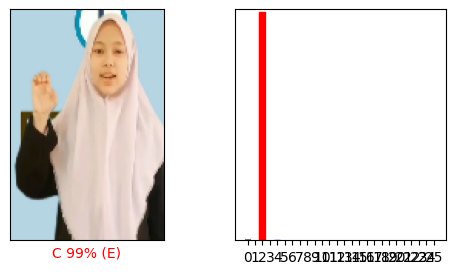

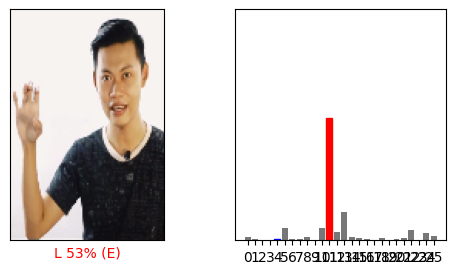

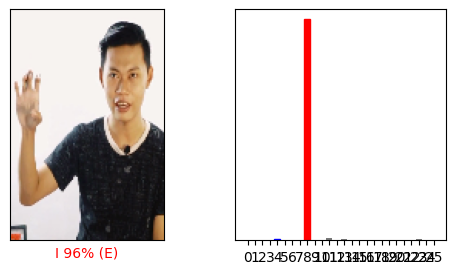

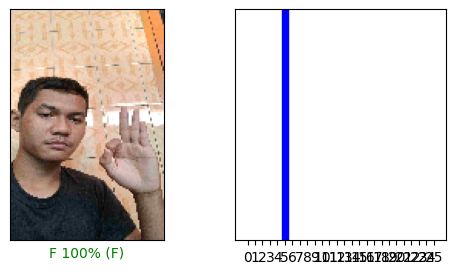

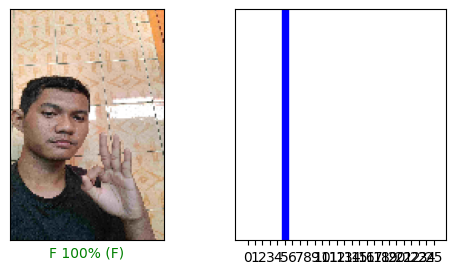

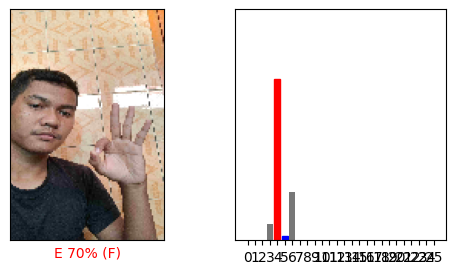

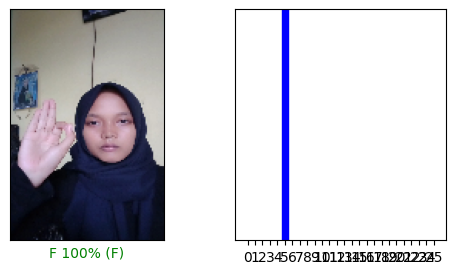

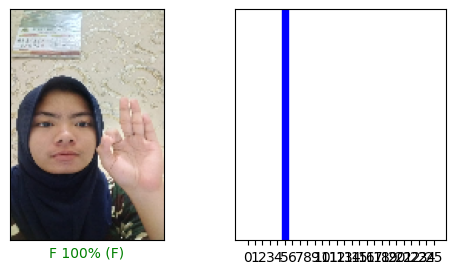

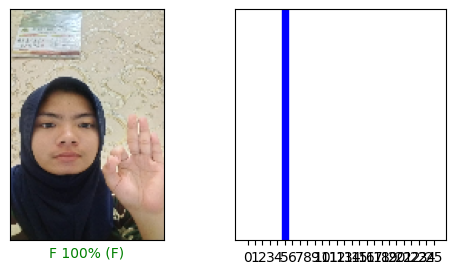

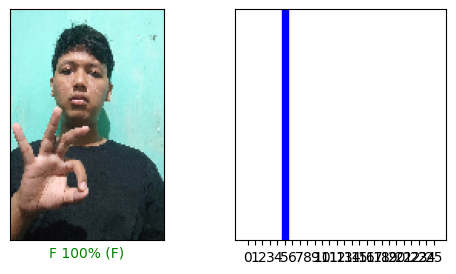

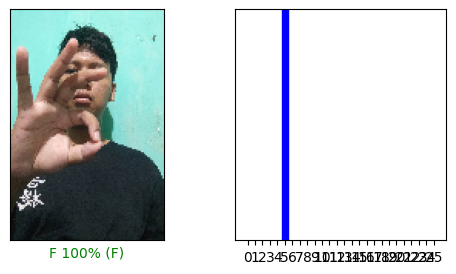

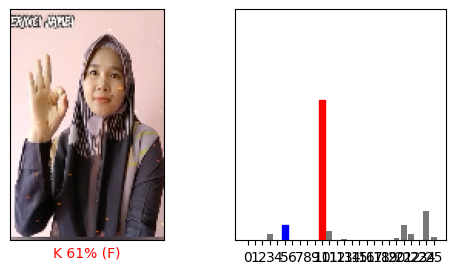

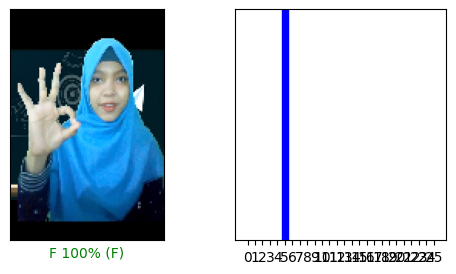

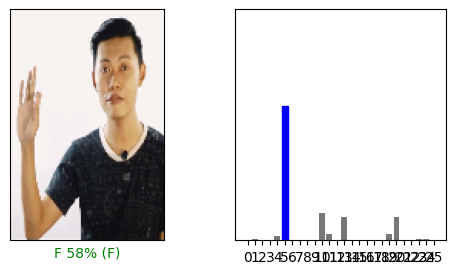

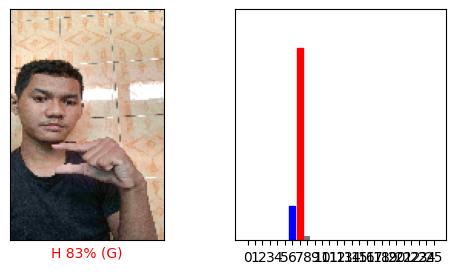

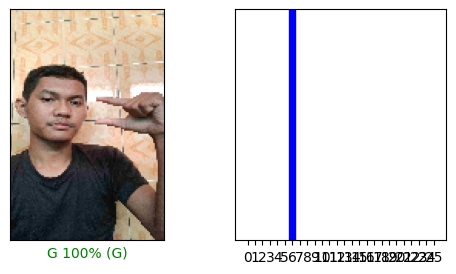

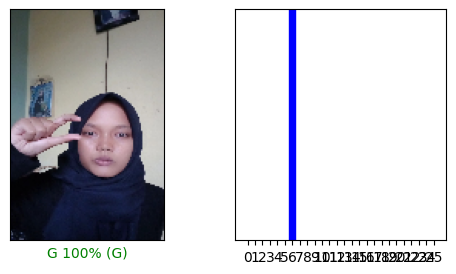

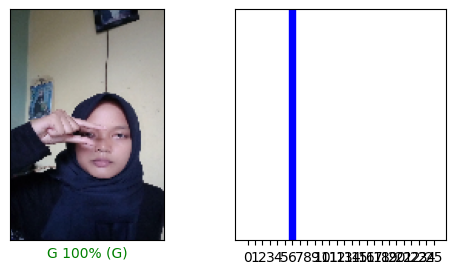

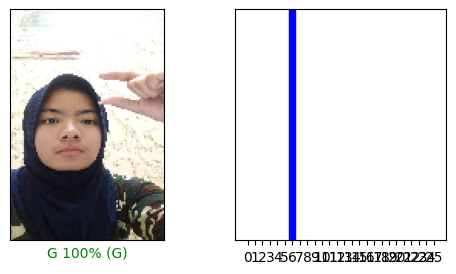

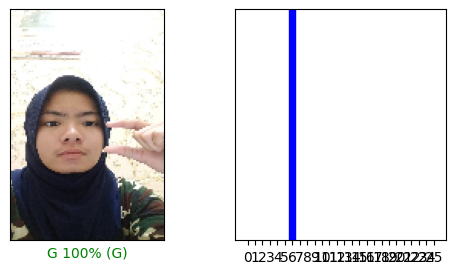

In [114]:
# Visualize the outputs

# Select index of image to display. Minimum index value is 1 and max index value is 50. 

for index in range(20):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(index, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(index, predictions, test_labels)
    plt.show()